# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"


In [5]:
# Importing JSON to use json.dumps to format data


In [6]:
# Fetch current BTC price
btc_current_price_data = requests.get(btc_url).json()
print(json.dumps(btc_current_price_data, indent=4))


# Fetch current ETH price
eth_current_price_data = requests.get(eth_url).json()
print(json.dumps(eth_current_price_data, indent=4))

# Compute current value of my crpto
btc_current_price = btc_current_price_data['data']['1']['quotes']['USD']['price']
eth_current_price = eth_current_price_data['data']['1027']['quotes']['USD']['price']
my_btc_value = my_btc * btc_current_price
my_eth_value = my_eth * eth_current_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19207443,
            "total_supply": 19207443,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 16518.49,
                    "volume_24h": 36836342155,
                    "market_cap": 317169813518,
                    "percentage_change_1h": 0.436857620901865,
                    "percentage_change_24h": 0.401441463212951,
                    "percentage_change_7d": -20.9906232135056,
                    "percent_change_1h": 0.436857620901865,
                    "percent_change_24h": 0.401441463212951,
                    "percent_change_7d": -20.9906232135056
                }
            },
            "last_updated": 1668467063
        }
    },
    "metadata": {
        "timestamp": 1668467063,
        "num_cr

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_key = os.getenv('API_Key')
alpaca_secret_key = os.getenv('Secret_Code')
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_key,
    alpaca_secret_key,
    api_version="v2"
)
type(alpaca_key)

str

In [9]:
# Format current date as ISO format
today = pd.Timestamp('2022-11-9', tz='America/New_York').isoformat()
# Set the tickers
ticker = ['AGG', 'SPY']

# Set timeframe to "1Day" for Alpaca API
timeframe = '1Day'

# Get current closing prices for SPY and AGG
stocks_and_bonds_port_df = alpaca.get_bars(
    ticker,
    timeframe,
    start=today,
    end=today
).df

stocks_and_bonds_port_df
# Reorganize the DataFrame
# Separate ticker data
AGG = stocks_and_bonds_port_df[stocks_and_bonds_port_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = stocks_and_bonds_port_df[stocks_and_bonds_port_df['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
stocks_and_bonds_port_df = pd.concat([AGG,SPY],axis=1, keys=['AGG','SPY'])
# Preview DataFrame
stocks_and_bonds_port_df.head()

AGG                                              \
                            open     high    low  close   volume trade_count   
timestamp                                                                      
2022-11-09 05:00:00+00:00  94.39  94.7001  94.25  94.55  6661375       27653   

                                         SPY                          \
                                vwap    open    high     low   close   
timestamp                                                              
2022-11-09 05:00:00+00:00  94.495474  379.93  381.14  373.61  374.13   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2022-11-09 05:00:00+00:00  77996412      589795  377.164224

In [10]:
# Pick AGG and SPY close prices
agg_close_price = float(stocks_and_bonds_port_df['AGG']['close'])
spy_close_price = float(stocks_and_bonds_port_df['SPY']['close'])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $94.55
Current SPY closing price: $374.13


In [11]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18706.50
The current value of your 200 AGG shares is $18910.00


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
shares = my_agg_value + my_spy_value
crypto = my_btc_value + my_eth_value

# Setting tickers
ticker = ['shares','crypto']

# Create savings DataFrame
savings_data = {
    "amount":[shares, crypto]
}
df_savings = pd.DataFrame(savings_data,index=ticker)
# Display savings DataFrame
display(df_savings)

,amount
shares,37616.500
crypto,26326.666


array([<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>],
      dtype=object)

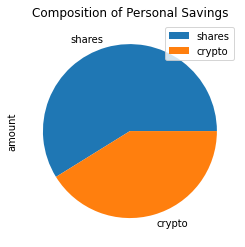

In [13]:
# Plot savings pie chart
df_savings.plot.pie(title={'Composition of Personal Savings'}, ylabel='amount',subplots=True)

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = shares + crypto
# Validate saving health
# Settign up my IF statements
if total_savings > emergency_fund:
    print(f"Congrats! You are Ballin, don't stop now!")
if total_savings == emergency_fund:
    print(f"Eh. You are about to be Ballin. Keep working.")
if total_savings < emergency_fund:
    print(f"Bro you are ${emergency_fund - total_savings} away from being a Baby Baller!")

Congrats! You are Ballin, don't stop now!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-11-09', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-11-09', tz='America/New_York').isoformat()
# Setting timeframe
timeframe='1Day'

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
# Setting tickers
tickers = ['AGG','SPY']

# Creating DataFrame
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
# Reorganize the DataFrame
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol',axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol',axis=1)
# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG,SPY],axis=1, keys=['AGG','SPY'])
# Display sample data
df_stock_data.head()

AGG                                    \
                             open    high     low    close   volume   
timestamp                                                             
2017-11-09 05:00:00+00:00  109.39  109.46  109.30  109.430  2479826   
2017-11-10 05:00:00+00:00  109.06  109.15  108.97  108.990  1751136   
2017-11-13 05:00:00+00:00  109.11  109.11  108.96  108.990  1891563   
2017-11-14 05:00:00+00:00  109.01  109.12  109.00  109.100  2799967   
2017-11-15 05:00:00+00:00  109.26  109.38  109.14  109.335  2496168   

                                                      SPY                    \
                          trade_count        vwap    open      high     low   
timestamp                                                                     
2017-11-09 05:00:00+00:00       10095  109.404273  257.73  258.3900  256.36   
2017-11-10 05:00:00+00:00        7642  109.034170  257.73  258.2926  257.37   
2017-11-13 05:00:00+00:00        8098  109.021309  257.30  258.5900  257.27   
2017-11-14 05:00:00+00:00       11233  109.088460  257.41  257.8500  256.52   
2017-11-15 05:00:00+00:00        8706  109.273074  256.62  257.2200  255.63   

                                                                       
                              close    volume trade_count        vwap  
timestamp                                                              
2017-11-09 05:00:00+00:00  258.1908  95115637      349621  257.756200  
2017-11-10 05:00:00+00:00  258.1000  59984662      176651  257.956079  
2017-11-13 05:00:00+00:00  258.3400  51392695      149087  258.137686  
2017-11-14 05:00:00+00:00  257.7500  61739527      204505  257.563860  
2017-11-15 05:00:00+00:00  256.4200  81516581      257052  256.625509

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_60_40_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.40,0.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [18]:
# Printing the simulation input data
MC_60_40_dist.portfolio_data.head()

AGG                                    \
                             open    high     low    close   volume   
timestamp                                                             
2017-11-09 05:00:00+00:00  109.39  109.46  109.30  109.430  2479826   
2017-11-10 05:00:00+00:00  109.06  109.15  108.97  108.990  1751136   
2017-11-13 05:00:00+00:00  109.11  109.11  108.96  108.990  1891563   
2017-11-14 05:00:00+00:00  109.01  109.12  109.00  109.100  2799967   
2017-11-15 05:00:00+00:00  109.26  109.38  109.14  109.335  2496168   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-11-09 05:00:00+00:00       10095  109.404273          NaN  257.73   
2017-11-10 05:00:00+00:00        7642  109.034170    -0.004021  257.73   
2017-11-13 05:00:00+00:00        8098  109.021309     0.000000  257.30   
2017-11-14 05:00:00+00:00       11233  109.088460     0.001009  257.41   
2017-11-15 05:00:00+00:00        8706  109.273074     0.002154  256.62   

                                                                             \
                               high     low     close    volume trade_count   
timestamp                                                                     
2017-11-09 05:00:00+00:00  258.3900  256.36  258.1908  95115637      349621   
2017-11-10 05:00:00+00:00  258.2926  257.37  258.1000  59984662      176651   
2017-11-13 05:00:00+00:00  258.5900  257.27  258.3400  51392695      149087   
2017-11-14 05:00:00+00:00  257.8500  256.52  257.7500  61739527      204505   
2017-11-15 05:00:00+00:00  257.2200  255.63  256.4200  81516581      257052   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-11-09 05:00:00+00:00  257.756200          NaN  
2017-11-10 05:00:00+00:00  257.956079    -0.000352  
2017-11-13 05:00:00+00:00  258.137686     0.000930  
2017-11-14 05:00:00+00:00  257.563860    -0.002284  
2017-11-15 05:00:00+00:00  256.625509    -0.005160

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_60_40_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/milluminatillc/Desktop/Module5/Module_5_Homework/Module_5_Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004121,1.015518,1.001789,0.978104,1.011939,1.006475,1.000921,0.999371,0.980861,1.010085,...,0.994261,1.007508,0.997712,0.995981,1.008914,1.006150,0.982203,0.990481,0.989532,1.003194
2,1.011000,1.010621,0.990894,0.986779,1.021930,1.004744,1.005273,0.993058,0.992011,1.027258,...,0.990318,1.016215,0.980026,0.997070,1.013661,1.000763,0.981072,0.993707,0.985697,1.007817
3,1.006877,1.016048,0.987762,0.996210,1.026647,1.011529,1.025254,0.997204,0.983552,1.025807,...,0.982808,1.021011,0.984093,0.992770,1.010107,1.002172,0.978672,0.989195,0.995359,1.014868
4,1.015712,1.000955,1.003132,0.997150,1.024051,1.020390,1.037445,0.997221,0.982415,1.022647,...,0.981806,1.016113,0.986135,1.005766,1.007056,0.993593,0.977087,0.992618,0.977464,1.005663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.815781,1.150043,10.717013,5.225354,2.558435,8.883813,3.671763,10.078717,2.988994,7.040132,...,2.517101,0.504985,5.462989,3.434187,8.274935,7.048417,1.586598,1.859149,1.221778,5.151872
7557,1.805482,1.153087,10.863496,5.164463,2.545095,8.852647,3.665025,10.142172,3.001481,7.083563,...,2.516708,0.510697,5.535040,3.396944,8.285886,7.029294,1.580889,1.890583,1.218805,5.156835
7558,1.816161,1.145240,10.848740,5.174804,2.539730,8.924671,3.650907,10.170754,2.970727,7.118676,...,2.513591,0.509923,5.538830,3.410853,8.270745,7.031413,1.597490,1.886209,1.218423,5.181270
7559,1.830207,1.152600,10.764471,5.238651,2.553692,8.923749,3.584351,10.188557,2.956360,7.082605,...,2.531456,0.515209,5.596109,3.425077,8.235984,7.056751,1.605498,1.900399,1.212345,5.232501


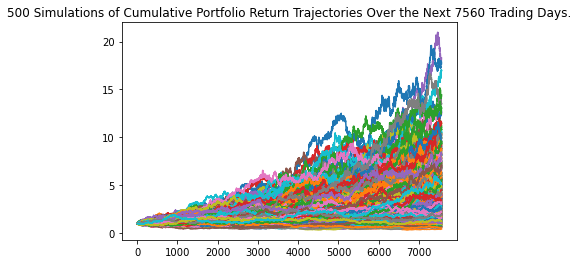

In [20]:
# Plot simulation outcomes
line_plot = MC_60_40_dist.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

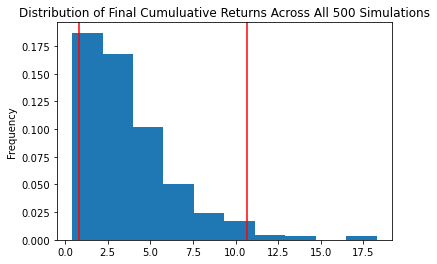

In [21]:
# Plot probability distribution and confidence intervals
MC_60_40_dist.plot_distribution()

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_60_40_dist.summarize_cumulative_return()
# Print summary statistics
print(tbl)

count           500.000000
mean              3.848158
std               2.771890
min               0.413408
25%               1.918220
50%               2.988474
75%               5.136622
max              18.276106
95% CI Lower      0.802280
95% CI Upper     10.651883
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $16045.59 and $213037.66


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $24068.39 and $319556.49


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_early_5_year_retirement = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.40,0.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_early_5_year_retirement.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/milluminatillc/Desktop/Module5/Module_5_Homework/Module_5_Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004575,1.007730,1.003418,1.007181,0.998170,0.998004,1.005269,1.003777,1.004044,0.995709,...,1.002797,0.994063,0.999486,0.997166,1.006319,1.006000,1.001092,0.993840,1.007432,0.997083
2,0.998724,1.004688,1.002537,1.004895,1.006023,1.007772,0.999001,0.997351,1.003749,0.987669,...,1.011225,1.000157,0.999036,0.985192,1.014927,1.007246,0.998510,1.005025,1.005035,0.997865
3,0.990088,1.011763,0.990192,1.007737,0.999038,1.000489,0.987486,1.003232,1.004536,0.983112,...,1.014621,1.001132,1.001311,0.991971,1.015890,1.008720,1.002608,1.007400,1.008729,0.989268
4,0.981337,1.007070,1.001817,1.012093,1.004870,1.014282,0.969593,0.995969,1.000319,0.976749,...,1.015533,1.009792,0.999701,0.995435,1.005473,1.009763,1.010636,1.005407,1.011429,0.997163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.167705,1.035035,0.822160,1.473780,1.252357,0.905196,0.867612,0.943107,0.817421,1.558186,...,0.757865,1.473421,0.885708,1.147629,1.715202,0.970111,0.726769,1.339288,1.377999,0.836994
1257,1.176125,1.042154,0.826185,1.462865,1.254226,0.911927,0.854985,0.930568,0.823675,1.555987,...,0.756073,1.475243,0.885543,1.139854,1.704093,0.974293,0.724067,1.346928,1.400058,0.835736
1258,1.176125,1.040632,0.820429,1.453369,1.268232,0.907373,0.857759,0.934148,0.812466,1.544750,...,0.768922,1.458559,0.895576,1.131323,1.723072,0.967938,0.724442,1.346532,1.387595,0.838868
1259,1.189556,1.043177,0.821497,1.462944,1.276418,0.911793,0.852927,0.950382,0.803845,1.550676,...,0.759265,1.432021,0.871673,1.136756,1.692923,0.966904,0.725231,1.369361,1.365201,0.850620


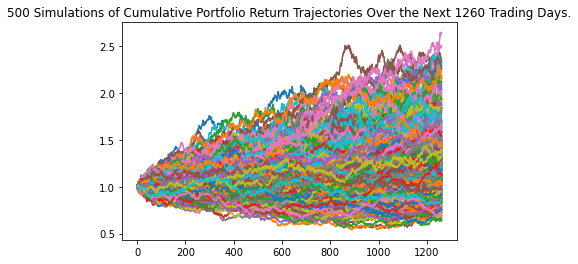

In [27]:
# Plot simulation outcomes
line_plot = MC_early_5_year_retirement.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

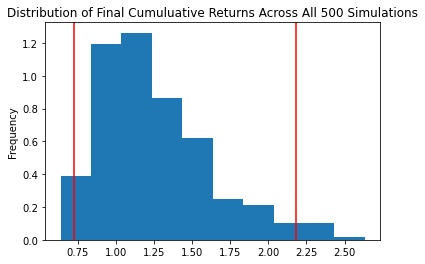

In [28]:
# Plot probability distribution and confidence intervals
MC_early_5_year_retirement.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5 = MC_early_5_year_retirement.summarize_cumulative_return()
# Print summary statistics
print(tbl)

count           500.000000
mean              1.247887
std               0.364739
min               0.637479
25%               0.976490
50%               1.178118
75%               1.448009
max               2.633549
95% CI Lower      0.723156
95% CI Upper      2.179536
Name: 1260, dtype: float64


In [30]:
# Set initial investment
MC_5year_early_initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_5[8]*60000,2)
ci_upper_five = round(tbl_5[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $43389.35 and $130772.17


### Ten Years Retirement Option

In [45]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_early_10_year_retirement = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.40,0.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [46]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_early_10_year_retirement.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/milluminatillc/Desktop/Module5/Module_5_Homework/Module_5_Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012334,1.000000,0.995490,1.000602,1.010874,0.999539,1.008938,1.003951,1.002472,0.987104,...,0.989890,0.996358,0.995332,1.006697,0.999845,1.009998,1.000477,0.999849,0.991597,1.004219
2,1.013967,1.010581,0.998360,1.002454,1.009915,1.009438,1.006443,0.997691,0.995058,0.996339,...,0.986147,1.011693,0.981358,1.005015,1.000093,1.007569,1.014436,0.995128,0.997384,0.995838
3,1.013954,1.018355,1.004168,0.999022,1.011597,1.014535,1.001559,0.991179,0.992829,0.991164,...,0.979827,0.999763,0.972422,0.993545,1.006026,1.017565,1.008958,0.986121,1.000192,1.006292
4,1.017239,1.010559,1.002480,0.996358,1.017726,1.014475,1.018774,0.994548,1.001413,1.010288,...,0.984488,0.996807,0.991490,0.989432,1.018304,1.021657,1.009821,0.972444,1.002302,1.016381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.096110,1.826592,1.921411,2.228033,1.116956,1.462218,1.725397,0.977901,0.941418,1.315818,...,1.874779,0.839717,1.510293,1.352915,0.883550,1.322806,1.536824,0.747784,1.691343,1.931660
2517,1.097822,1.837581,1.916215,2.216967,1.099723,1.448144,1.743624,0.985009,0.942467,1.321063,...,1.885187,0.856874,1.492573,1.349744,0.887061,1.328261,1.529356,0.744186,1.706728,1.940506
2518,1.093035,1.849374,1.894902,2.212427,1.088661,1.461376,1.750939,0.986789,0.933466,1.301938,...,1.925246,0.858405,1.488290,1.334554,0.892907,1.324531,1.557884,0.748887,1.699315,1.951549
2519,1.085060,1.838200,1.900980,2.199192,1.065143,1.448633,1.739961,0.990746,0.945211,1.312326,...,1.946095,0.852761,1.500015,1.331414,0.891776,1.304028,1.556202,0.740971,1.694285,1.927208


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

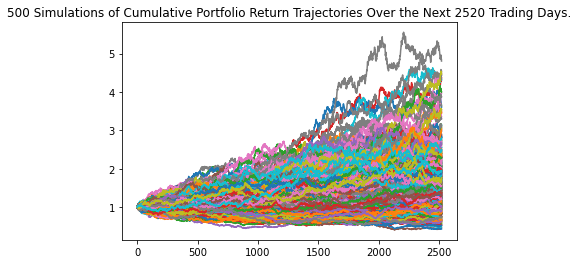

In [50]:
# Plot simulation outcomes
MC_early_10_year_retirement.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

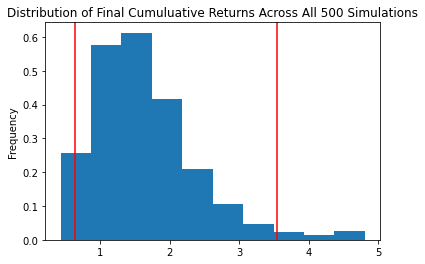

In [51]:
# Plot probability distribution and confidence intervals
MC_early_10_year_retirement.plot_distribution()

In [52]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_10 = MC_early_10_year_retirement.summarize_cumulative_return()
# Print summary statistics
print(tbl_10)

count           500.000000
mean              1.639791
std               0.737269
min               0.428763
25%               1.112969
50%               1.505254
75%               1.968796
max               4.805196
95% CI Lower      0.633302
95% CI Upper      3.535633
Name: 2520, dtype: float64


In [54]:
# Set initial investment
MC_10year_early_initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_10[8]*60000,2)
ci_upper_ten = round(tbl_10[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $37998.14 and $212138.01
